In [1]:
# -*-coding:utf-8-*-

import numbers
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from numpy import interp
from sklearn import metrics
from itertools import cycle

In [2]:
np.random.seed(0)
pd.set_option('display.width', 300)
np.set_printoptions(suppress=True)
data = pd.read_csv('../dataset/iris.data', header=None)
iris_types = data[4].unique()
for i, iris_type in enumerate(iris_types):
    data.set_value(data[4] == iris_type, 4, i)
x = data.iloc[:, :2]
n, features = x.shape
print x
y = data.iloc[:, -1].astype(np.int)
c_number = np.unique(y).size
x, x_test, y, y_test = train_test_split(x, y, train_size=0.6, random_state=0)
y_one_hot = label_binarize(y_test, classes=np.arange(c_number))
alpha = np.logspace(-2, 2, 20)
models = [
    ['KNN', KNeighborsClassifier(n_neighbors=7)],
    ['LogisticRegression', LogisticRegressionCV(Cs=alpha, penalty='l2', cv=3)],
    ['SVM(Linear)', GridSearchCV(SVC(kernel='linear', decision_function_shape='ovr'), param_grid={'C': alpha})],
    ['SVM(RBF)',
     GridSearchCV(SVC(kernel='rbf', decision_function_shape='ovr'), param_grid={'C': alpha, 'gamma': alpha})]]
colors = cycle('gmcr')

       0    1
0    5.1  3.5
1    4.9  3.0
2    4.7  3.2
3    4.6  3.1
4    5.0  3.6
5    5.4  3.9
6    4.6  3.4
7    5.0  3.4
8    4.4  2.9
9    4.9  3.1
10   5.4  3.7
11   4.8  3.4
12   4.8  3.0
13   4.3  3.0
14   5.8  4.0
15   5.7  4.4
16   5.4  3.9
17   5.1  3.5
18   5.7  3.8
19   5.1  3.8
20   5.4  3.4
21   5.1  3.7
22   4.6  3.6
23   5.1  3.3
24   4.8  3.4
25   5.0  3.0
26   5.0  3.4
27   5.2  3.5
28   5.2  3.4
29   4.7  3.2
..   ...  ...
120  6.9  3.2
121  5.6  2.8
122  7.7  2.8
123  6.3  2.7
124  6.7  3.3
125  7.2  3.2
126  6.2  2.8
127  6.1  3.0
128  6.4  2.8
129  7.2  3.0
130  7.4  2.8
131  7.9  3.8
132  6.4  2.8
133  6.3  2.8
134  6.1  2.6
135  7.7  3.0
136  6.3  3.4
137  6.4  3.1
138  6.0  3.0
139  6.9  3.1
140  6.7  3.1
141  6.9  3.1
142  5.8  2.7
143  6.8  3.2
144  6.7  3.3
145  6.7  3.0
146  6.3  2.5
147  6.5  3.0
148  6.2  3.4
149  5.9  3.0

[150 rows x 2 columns]


0.877083333333
[ 2.06913808  2.06913808  0.11288379]
0.890972222222
{'C': 0.11288378916846889}
0.880694444444
{'C': 0.18329807108324356, 'gamma': 0.48329302385717521}
0.892361111111


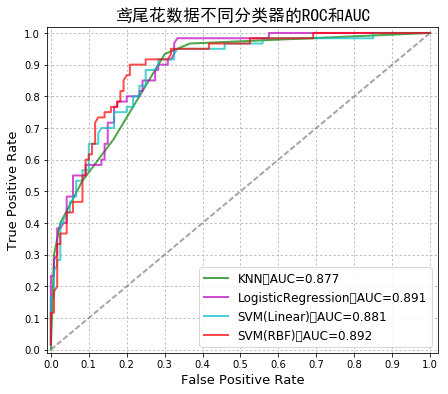

In [4]:
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(7, 6), facecolor='w')
for (name, model), color in zip(models, colors):
    model.fit(x, y)
    if hasattr(model, 'C_'):
        print(model.C_)
    if hasattr(model, 'best_params_'):
        print(model.best_params_)
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(x_test)
    else:
        y_score = model.decision_function(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(), y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print(auc)
    plt.plot(fpr, tpr, c=color, lw=2, alpha=0.7, label=u'%s，AUC=%.3f' % (name, auc))
plt.plot((0, 1), (0, 1), c='#808080', lw=2, ls='--', alpha=0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
# plt.legend(loc='lower right', fancybox=True, framealpha=0.8, edgecolor='#303030', fontsize=12)
plt.title(u'鸢尾花数据不同分类器的ROC和AUC', fontsize=17, fontproperties=fontproperties)
plt.show()